<a href="https://colab.research.google.com/github/Jaelibj/JaeliJaussi/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The core task we're interested in is identifying those customers most likely to subscribe to a term deposit.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. In this case, our financial institution.

I don't know a lot about data science, but I've been trying to get up to speed. Do you think a supervised or unsupervised approach would work best for this situation?

Supervised with a tree model. We want to predict the y column (whether someone will make a term deposit) based on the other categorical data.

Miguel, that is a great question.

While we are asking detailed questions, the dataset has approximately 37,000 records. How much of that data will you use to train your model?

Based on your initial analysis of the data, your team feels:

A simple 80/20 split will provide us with enough to accurately train and test our model.
A 50/50 split so that we have the same amount of training data as testing.
We will pull out 1,000 records for our test dataset and use the other 36,000 for training. This gives our model more to train on and will produce better results.
We will use all 37,000 for training and use cross-validation to evaluate the model.

80/20 split for training and testing

Aside from the core marketing question Miguel mentioned, I'm wondering if there are other insights we could gain from our data.

I can look at the data and tell that some days of the week or some months produce better results than others.

I'm wondering if it's possible for us to see if those results are true for all customers, or if some types of customers respond better on certain days than others?

Since we're operating in the European Union, we're subject to GDPR compliance requirements.

What do you think we might need to do for this project in order to be compliant with GDPR regulations?

Beatriz, Senior Data Scientist asks:
Since we're operating in the European Union, we're subject to GDPR compliance requirements.

What do you think we might need to do for this project in order to be compliant with GDPR regulations?

Based on your initial analysis of the data, your team feels:

This is historic data, so we should be just fine.
This is anonymous data, so we should be just fine.
The GDPR doesn't apply in this situation, since we're just building a model, not selling data.
In order to use this data under GDPR, we'll need to get consent from the customers in the dataset.

GDPR does not apply because our data is anonymous.

Who is more likely to make a term deposit?

Other questions to answer

- Which people should be called on which day/month? Robert and Shaun
- Does frequent contact poorly affect marketing campaigns? Dylan
- Make different models for different economic contexts. Jaeli and Peter

In [4]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

campaign.head()
campaign.info()
campaign.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='day_of_week', ylabel='y_yes'>

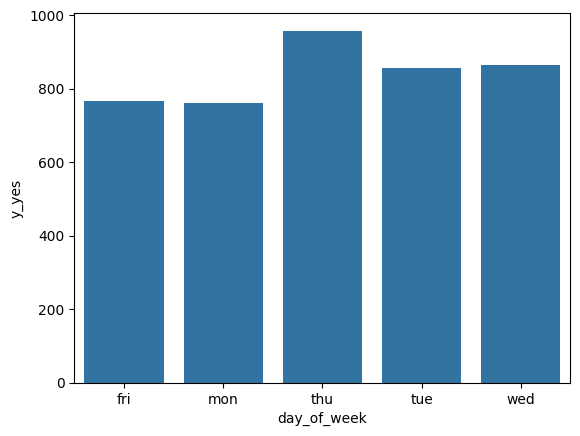

In [3]:
import seaborn as sns

df_day= (
    campaign
      .groupby('day_of_week')
      .agg(
          total=('y', 'size'),
          y_yes=('y', lambda x: (x== "yes").sum())
      )
      .reset_index()
)
sns.barplot(
    data=df_day,
    x='day_of_week',
    y='y_yes'
)

<Axes: xlabel='day_of_week', ylabel='y_yes'>

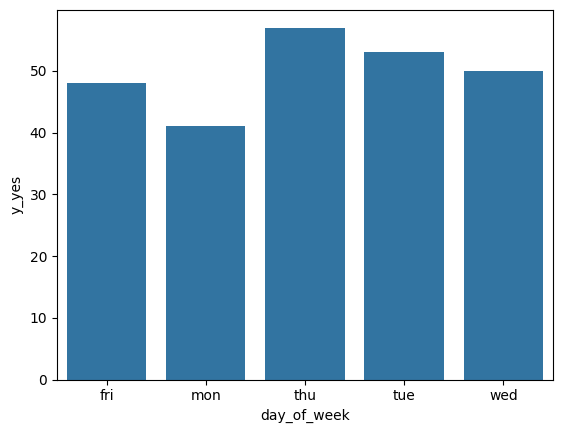

In [5]:
df_day= (
    campaign[campaign['job']== 'student']
      .groupby('day_of_week')
      .agg(
          total=('y', 'size'),
          y_yes=('y', lambda x: (x== "yes").sum())
      )
      .reset_index()
)
sns.barplot(
    data=df_day,
    x='day_of_week',
    y='y_yes'
)